In [ ]:
!conda config --add channels conda-forge
!conda config --set channel_priority strict
!conda install -y -c conda-forge libgdal
!conda install -y -c conda-forge gdal
!conda install -y -c conda-forge proj
!conda install -y -c conda-forge cartopy
!conda install -y -c conda-forge geoplot
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import pandas as pd
import geoplot as gplt
from geoplot import crs as gcrs

In [2]:
import logging
%matplotlib inline
logging.captureWarnings(True)

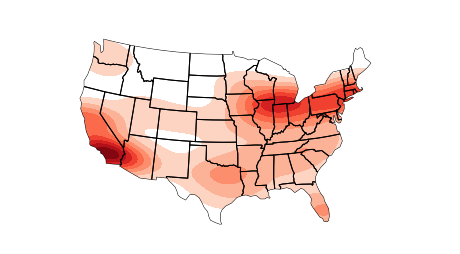

In [3]:
def get_cities(crs=4326, states='all'):
    path = 'https://gist.githubusercontent.com/Miserlou/c5cd8364bf9b2420bb29/raw/2bf258763cdddd704f8ffd3ea9a3e81d25e2c6f6/cities.json'
    cities_df = pd.read_json(path)
    if states == 'contiguous':
        cities_df = cities_df[(cities_df.state != 'Alaska') & (cities_df.state != 'Hawaii')]
    elif states == 'all':
        pass
    else:
        cities_df = cities_df[cities_df.state == states]

    geometry = [Point(xy) for xy in zip(cities_df['longitude'], cities_df['latitude'])]
    return gpd.geodataframe.GeoDataFrame(cities_df, crs={'init': 'epsg:4326'}, geometry=geometry).to_crs(epsg=crs)

contig = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

contig_cities = get_cities(4326, 'contiguous')

cities_plot = gplt.kdeplot(
    contig_cities, clip=contig.geometry,
    shade=True, cmap='Reds',
    projection=gcrs.AlbersEqualArea())

gplt.polyplot(contig, ax=cities_plot, zorder=1)